In [ ]:
# importing dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:

# installing and importing the dependency tsaug
#!pip install tsaug

import tsaug
from tsaug.visualization import plot

In [ ]:
# ##### PLEASE SET THESE CAREFULLY refer :instructions.txt
# INPUT_DIR_TRAIN = "/gdrive/Shareddrives/DLNN_ProjC1/output/sync_data_ishan/train"
# OUTPUT_DIR_TRAIN = "/gdrive/Shareddrives/DLNN_ProjC1/output/new_data_augmentation"
INPUT_DIR = "/Users/soham/Desktop/ECE 542/Project/Proj_C/Data/"
INPUT_DIR_TRAIN = "/Users/soham/Desktop/ECE 542/Project/Proj_C/Data/Data_sync/Data_sync_train/"
OUTPUT_DIR_TRAIN="/Users/soham/Desktop/ECE 542/Project/Proj_C/Data/Data_aug/"
OUTPUT_DIR_VAL="/Users/soham/Desktop/ECE 542/Project/Proj_C/Data/Data_aug/Data_aug_val"
#OUTPUT_DIR_TEST = "/Users/soham/Desktop/ECE 542/Project/Proj_C/Data/Data_sync/Data_sync_test/"
#####

#constants
ATTRIBUTE_NAMES = ["accel_x", "accel_y", "accel_z", "gyro_x", "gyro_y", "gyro_z", "CLASS", "xTIME", "yTIME"]
X_NAMES = ["accel_x", "accel_y", "accel_z", "gyro_x", "gyro_y", "gyro_z"]
OP_HEADERS = ["accel_x", "accel_y", "accel_z", "gyro_x", "gyro_y", "gyro_z", "CLASS"]
WINDOW_SIZE = 160 #4s

In [ ]:
# Loading the data from the file
sessions_train = {}
counts_of_classes_train = pd.DataFrame([], columns = ["filename", "zero", "one", "two", "three"])

sessions_val = {}
counts_of_classes_val = pd.DataFrame([], columns = ["filename", "zero", "one", "two", "three"])

input_files_train = sorted(os.listdir(INPUT_DIR_TRAIN))


for input_file in input_files_train:
  if ".csv" in input_file:
    print("reading:", input_file, end = "\t")
    sessions_train[input_file] = pd.read_csv(os.path.join(INPUT_DIR_TRAIN, input_file), names = ATTRIBUTE_NAMES)

    value_counts = sessions_train[input_file].CLASS.value_counts()
    for col in range(0, 4):
      if col not in value_counts.keys():
        value_counts[col] = 0
    counts_of_classes_train = counts_of_classes_train.append([{"filename": input_file,
                                                      "zero": value_counts[0], "one": value_counts[1], "two": value_counts[2], "three": value_counts[3]}], 
                                                      ignore_index=True)
    print("shape:", sessions_train[input_file].shape)

print("train_set_loaded")

reading: subject_001_01_x_sync.csv	shape: (37890, 9)
reading: subject_001_02_x_sync.csv	shape: (70172, 9)
reading: subject_001_03_x_sync.csv	shape: (43146, 9)
reading: subject_001_04_x_sync.csv	shape: (54956, 9)
reading: subject_001_05_x_sync.csv	shape: (59121, 9)
reading: subject_001_06_x_sync.csv	shape: (38631, 9)
reading: subject_001_07_x_sync.csv	shape: (31423, 9)
reading: subject_001_08_x_sync.csv	shape: (66762, 9)
reading: subject_002_01_x_sync.csv	shape: (55999, 9)
reading: subject_002_02_x_sync.csv	shape: (55401, 9)
reading: subject_002_03_x_sync.csv	shape: (48797, 9)
reading: subject_002_04_x_sync.csv	shape: (51461, 9)
reading: subject_002_05_x_sync.csv	shape: (42319, 9)
reading: subject_003_01_x_sync.csv	shape: (36313, 9)
reading: subject_003_02_x_sync.csv	shape: (47210, 9)
reading: subject_003_03_x_sync.csv	shape: (19533, 9)
reading: subject_004_01_x_sync.csv	shape: (34309, 9)
reading: subject_004_02_x_sync.csv	shape: (34476, 9)
reading: subject_005_01_x_sync.csv	shape: (560

In [ ]:
#we create five augmentations of each file:
# fast - 10% faster
# medium_fast - 5% faster
# same - same
# medium_slow - 5% slower
# slow - 10% slower


for input_file in sessions_train.keys():
  temp_df = sessions_train[input_file]
  total_samples = temp_df.shape[0]

  x_attribs = np.expand_dims(np.array(temp_df[X_NAMES]), axis =0)
  y_labels = np.expand_dims(np.array(temp_df["CLASS"]), axis=0)

  

  x_attribs_fast = tsaug.Resize(size = int(0.9*total_samples)).augment(x_attribs)
  x_attribs_slow = tsaug.Resize(size = int(1.1*total_samples)).augment(x_attribs)

  x_attribs_m_fast = tsaug.Resize(size = int(0.95*total_samples)).augment(x_attribs)
  x_attribs_m_slow = tsaug.Resize(size = int(1.05*total_samples)).augment(x_attribs)


  y_labels_fast = tsaug.Resize(size = int(0.9*total_samples)).augment(y_labels)
  y_labels_slow = tsaug.Resize(size = int(1.1*total_samples)).augment(y_labels)
  
  y_labels_m_fast = tsaug.Resize(size = int(0.95*total_samples)).augment(y_labels)
  y_labels_m_slow = tsaug.Resize(size = int(1.05*total_samples)).augment(y_labels)

    
  y_labels_fast = np.round(y_labels_fast).astype(np.uint8)
  y_labels_slow = np.round(y_labels_slow).astype(np.uint8)

  y_labels_m_fast = np.round(y_labels_m_fast).astype(np.uint8)
  y_labels_m_slow = np.round(y_labels_m_slow).astype(np.uint8)


  print(input_file[:-4])
  print(x_attribs.shape, y_labels.shape)  
 

  op_file = input_file[:-4] + "_fast.csv"
  op_arr = np.concatenate((x_attribs_fast[0], np.expand_dims(y_labels_fast[0], axis = -1)), axis = 1)
  pd.DataFrame(op_arr).to_csv(os.path.join(OUTPUT_DIR_TRAIN, op_file), index = False, header = OP_HEADERS)  

  op_file = input_file[:-4] + "_slow.csv"
  op_arr = np.concatenate((x_attribs_slow[0], np.expand_dims(y_labels_slow[0], axis = -1)), axis = 1)
  pd.DataFrame(op_arr).to_csv(os.path.join(OUTPUT_DIR_TRAIN, op_file), index = False, header = OP_HEADERS)  

  op_file = input_file[:-4] + "_m_fast.csv"
  op_arr = np.concatenate((x_attribs_m_fast[0], np.expand_dims(y_labels_m_fast[0], axis = -1)), axis = 1)
  pd.DataFrame(op_arr).to_csv(os.path.join(OUTPUT_DIR_VAL, op_file), index = False, header = OP_HEADERS)  

  op_file = input_file[:-4] + "_m_slow.csv"
  op_arr = np.concatenate((x_attribs_m_slow[0], np.expand_dims(y_labels_m_slow[0], axis = -1)), axis = 1)
  pd.DataFrame(op_arr).to_csv(os.path.join(OUTPUT_DIR_VAL, op_file), index = False, header = OP_HEADERS)  


  op_file = input_file[:-4] + "_same.csv"
  op_arr = np.concatenate((x_attribs[0], np.expand_dims(y_labels[0], axis = -1)), axis = 1)
  pd.DataFrame(op_arr).to_csv(os.path.join(OUTPUT_DIR_TRAIN, op_file), index = False, header = OP_HEADERS)

subject_001_01_x_sync
(1, 37890, 6) (1, 37890)
subject_001_02_x_sync
(1, 70172, 6) (1, 70172)
subject_001_03_x_sync
(1, 43146, 6) (1, 43146)
subject_001_04_x_sync
(1, 54956, 6) (1, 54956)
subject_001_05_x_sync
(1, 59121, 6) (1, 59121)
subject_001_06_x_sync
(1, 38631, 6) (1, 38631)
subject_001_07_x_sync
(1, 31423, 6) (1, 31423)
subject_001_08_x_sync
(1, 66762, 6) (1, 66762)
subject_002_01_x_sync
(1, 55999, 6) (1, 55999)
subject_002_02_x_sync
(1, 55401, 6) (1, 55401)
subject_002_03_x_sync
(1, 48797, 6) (1, 48797)
subject_002_04_x_sync
(1, 51461, 6) (1, 51461)
subject_002_05_x_sync
(1, 42319, 6) (1, 42319)
subject_003_01_x_sync
(1, 36313, 6) (1, 36313)
subject_003_02_x_sync
(1, 47210, 6) (1, 47210)
subject_003_03_x_sync
(1, 19533, 6) (1, 19533)
subject_004_01_x_sync
(1, 34309, 6) (1, 34309)
subject_004_02_x_sync
(1, 34476, 6) (1, 34476)
subject_005_01_x_sync
(1, 56079, 6) (1, 56079)
subject_005_02_x_sync
(1, 34519, 6) (1, 34519)
subject_005_03_x_sync
(1, 44905, 6) (1, 44905)
subject_006_0

In [ ]:
# checking shape
print(x_attribs_fast.shape, np.expand_dims(y_labels_fast[0], axis = -1).shape)

(1, 43324, 6) (43324, 1)


(<Figure size 1152x144 with 1 Axes>, <AxesSubplot:>)

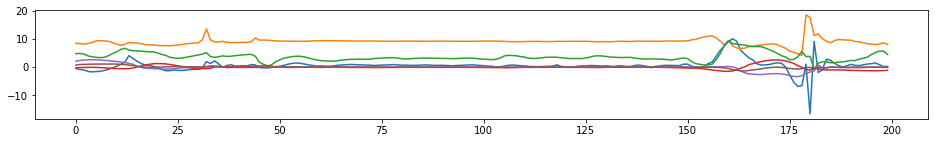

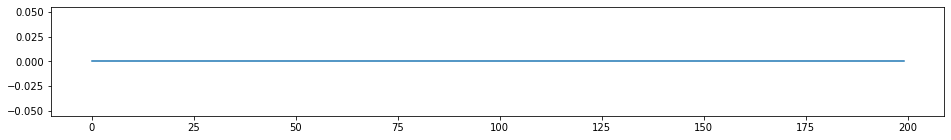

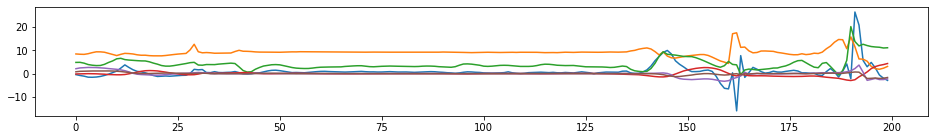

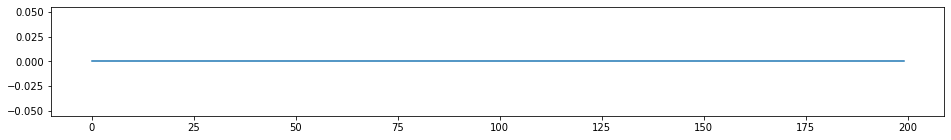

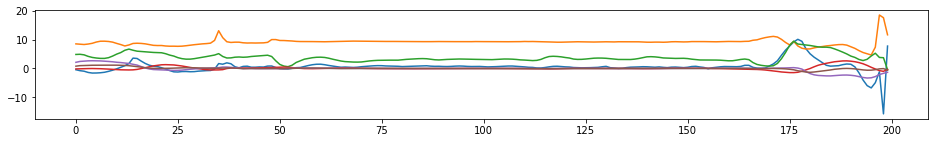

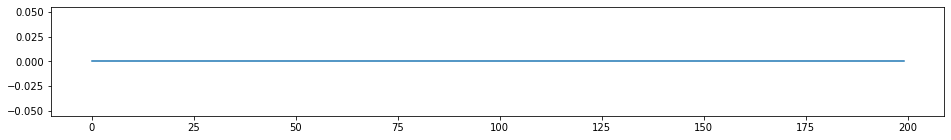

In [ ]:
# plotting and checking if augmentation is done properly
strt = 2400
gap = 200

plot(x_attribs[:, strt: strt+gap, ...])
plot(y_labels[:, strt: strt+gap, ...])



plot(x_attribs_fast[:, int(0.9*strt): int(0.9*strt)+gap, ...])
plot(y_labels_fast[:, int(0.9*strt): int(0.9*strt)+gap, ...])


plot(x_attribs_slow[:, int(1.1*strt): int(1.1*strt)+gap, ...])
plot(y_labels_slow[:, int(1.1*strt): int(1.1*strt)+gap, ...])